In [1]:
# 📊 Evaluación de la Red Neuronal Convolucional (CNN)

# 🔧 Cargar librerías
import os
import sys
sys.path.append("../src")

import yaml
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

import evaluate as ev
import utils

C:\Users\USS\anaconda3\envs\tf310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# 📁 Cargar configuración
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

In [3]:
# 📂 Cargar generador de validación
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_path = os.path.join(config["paths"]["prepared_data"], "val")
img_height = config["image"]["height"]
img_width = config["image"]["width"]
batch_size = config["training"]["batch_size"]

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)  # ← en vez de rescale
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),  # asegúrate que coincida (p.ej. 128x128)
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 355 images belonging to 54 classes.


In [4]:
# 💾 Cargar modelo entrenado
model_path = config["paths"]["model"]
model = load_model(model_path)

In [5]:
# 🔮 Predecir probabilidades
y_scores = model.predict(val_generator)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

C:\Users\USS\anaconda3\envs\tf310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 558ms/step


In [6]:
# 🔢 Convertir predicciones a clases
y_pred = np.argmax(y_scores, axis=1)

0.7549295774647887 0.6794940395959675 0.738609489543325


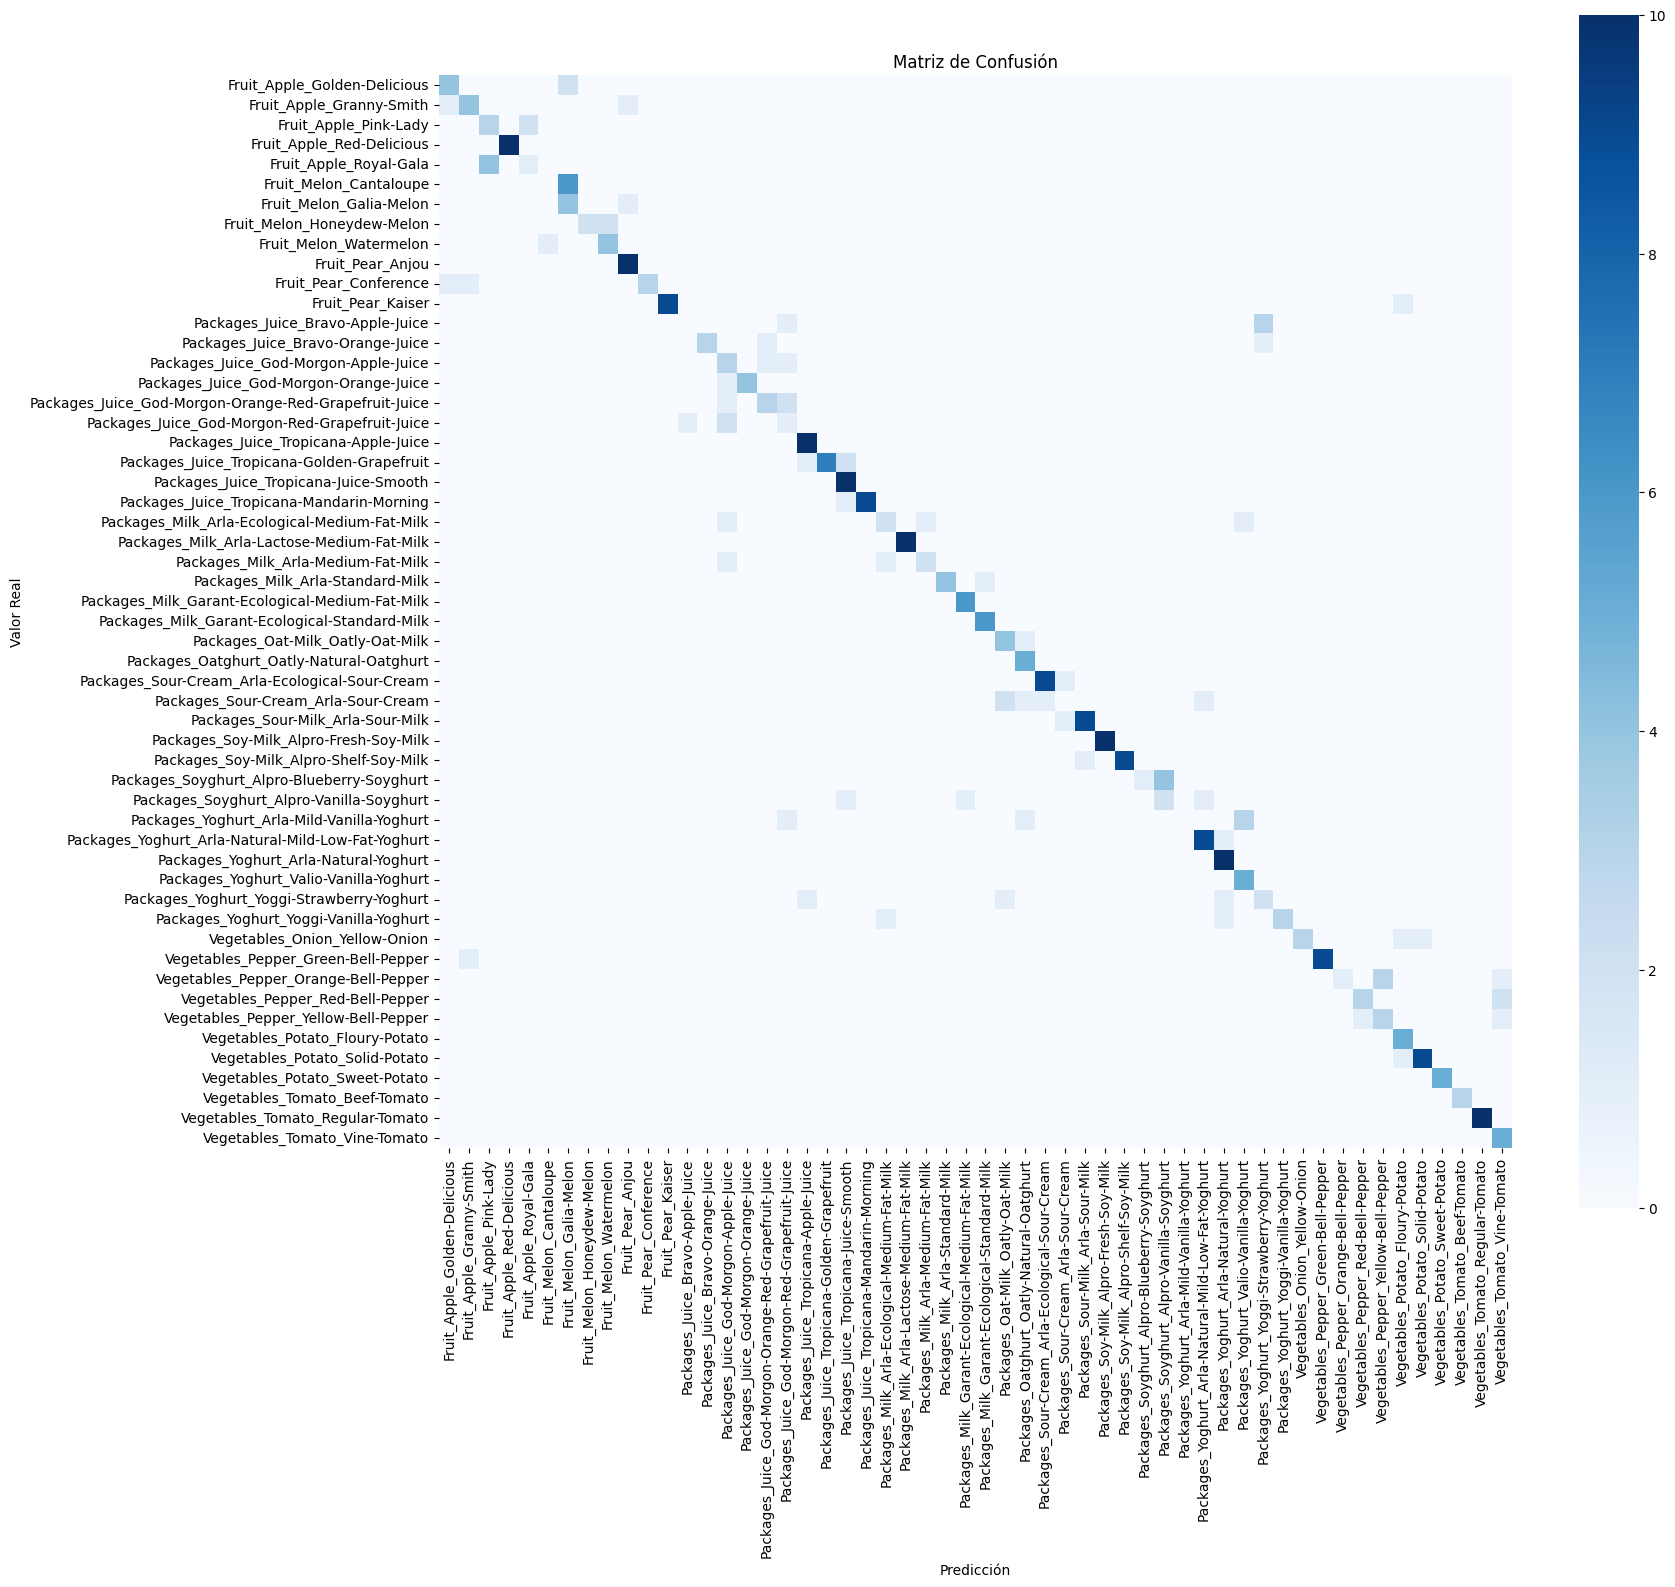

In [7]:
# 📊 Calcular y guardar métricas adicionales
from sklearn.metrics import accuracy_score, f1_score
import yaml, os

acc = accuracy_score(y_true, y_pred)
f1_macro = f1_score(y_true, y_pred, average="macro", zero_division=0)
f1_weighted = f1_score(y_true, y_pred, average="weighted", zero_division=0)

os.makedirs("results", exist_ok=True)
with open("results/metrics_v3.yaml", "w") as f:
    yaml.safe_dump({
        "accuracy": float(acc),
        "f1_macro": float(f1_macro),
        "f1_weighted": float(f1_weighted)
    }, f)

print(acc, f1_macro, f1_weighted)

# 📉 Matriz de Confusión multiclase
ev.plot_confusion_matrix(y_true, y_pred, class_names=class_names)


In [8]:
# 🧪 Métricas de clasificación
from sklearn.metrics import classification_report

# ✅ Mostrar métricas por clase
print("📄 Reporte de clasificación por clase:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

📄 Reporte de clasificación por clase:
                                                       precision    recall  f1-score   support

                         Fruit_Apple_Golden-Delicious       0.67      0.67      0.67         6
                             Fruit_Apple_Granny-Smith       0.67      0.67      0.67         6
                                Fruit_Apple_Pink-Lady       0.43      0.60      0.50         5
                            Fruit_Apple_Red-Delicious       1.00      1.00      1.00        10
                               Fruit_Apple_Royal-Gala       0.33      0.20      0.25         5
                               Fruit_Melon_Cantaloupe       0.00      0.00      0.00         6
                              Fruit_Melon_Galia-Melon       0.33      0.80      0.47         5
                           Fruit_Melon_Honeydew-Melon       1.00      0.50      0.67         4
                               Fruit_Melon_Watermelon       0.67      0.80      0.73         5
           

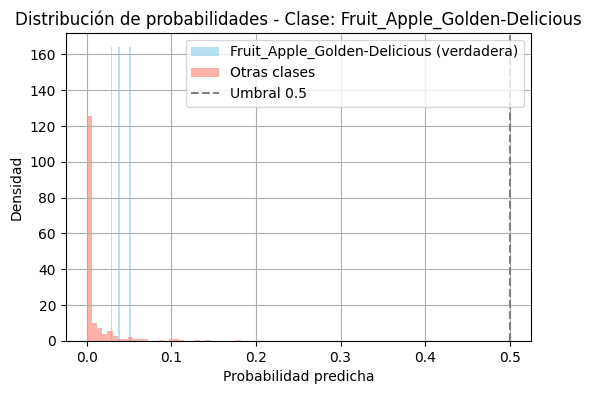

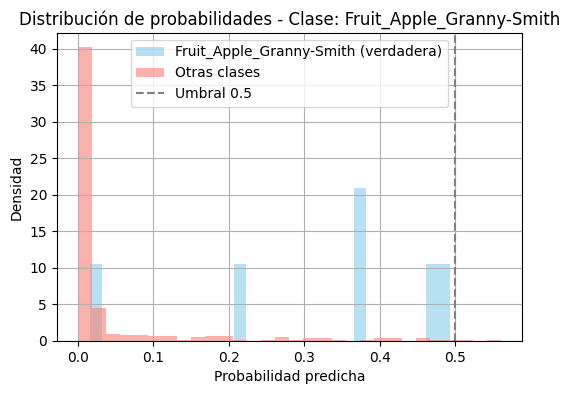

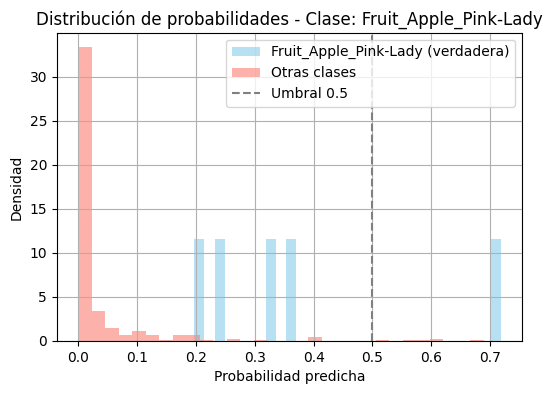

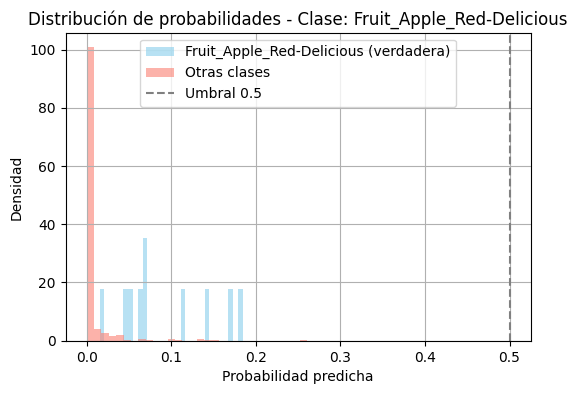

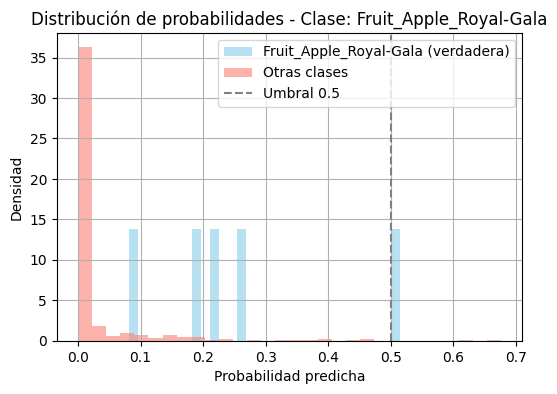

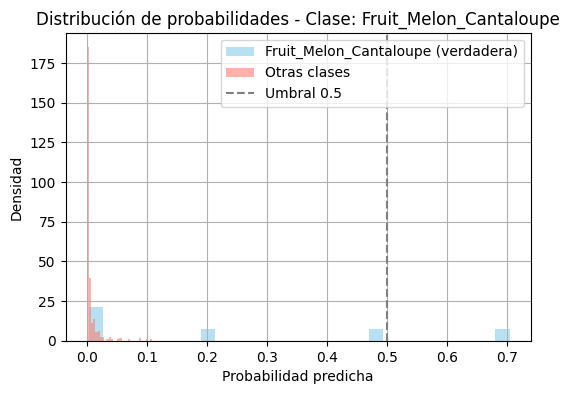

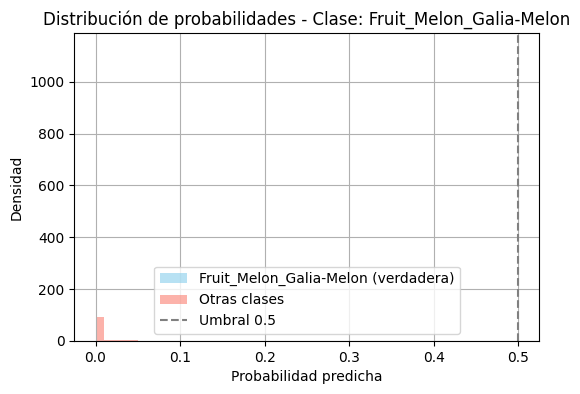

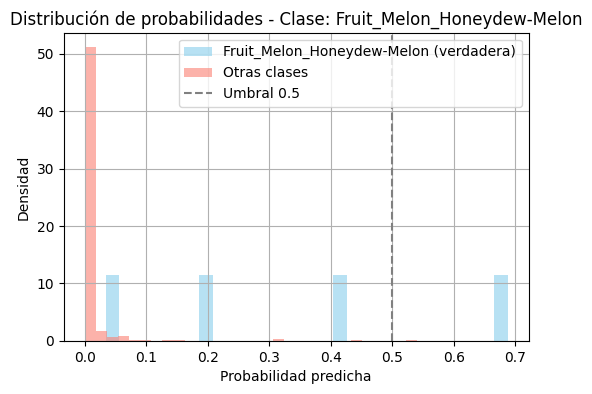

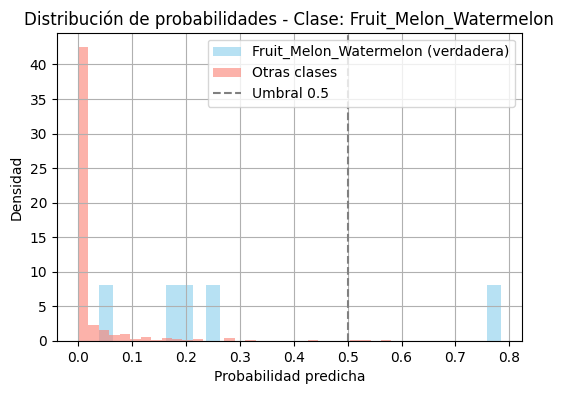

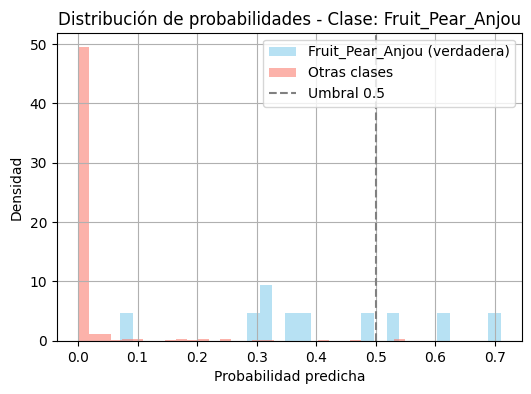

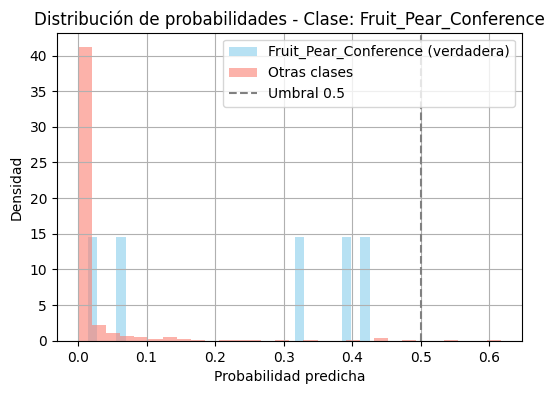

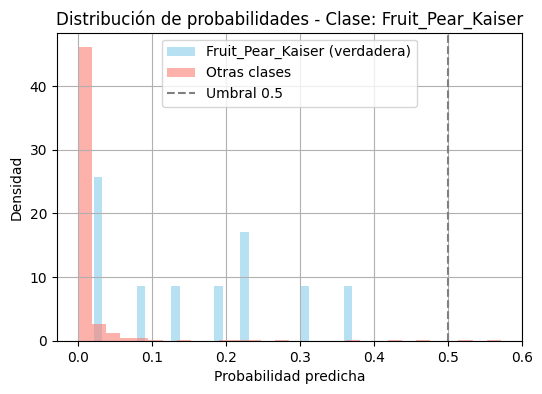

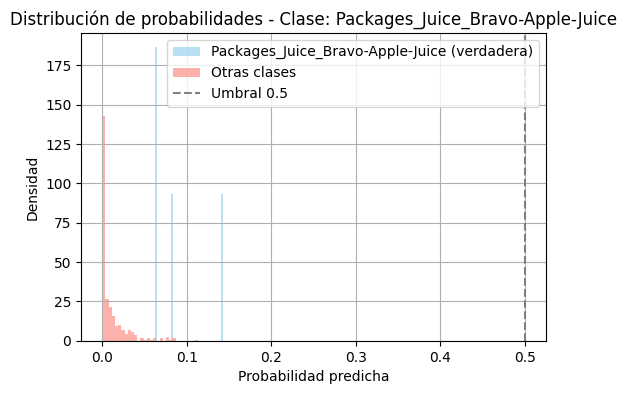

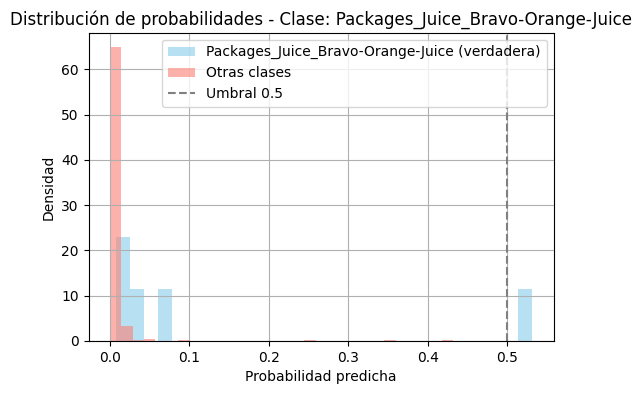

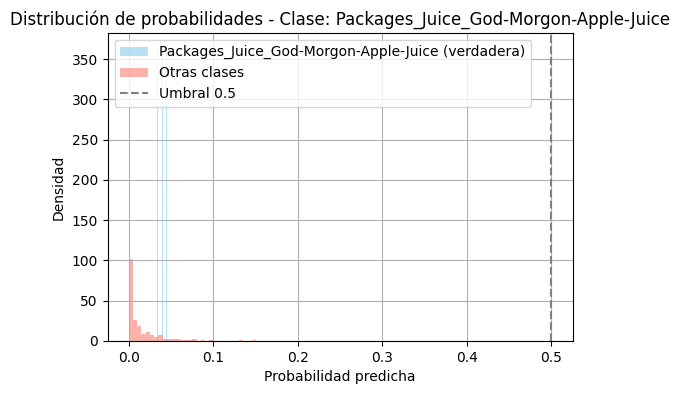

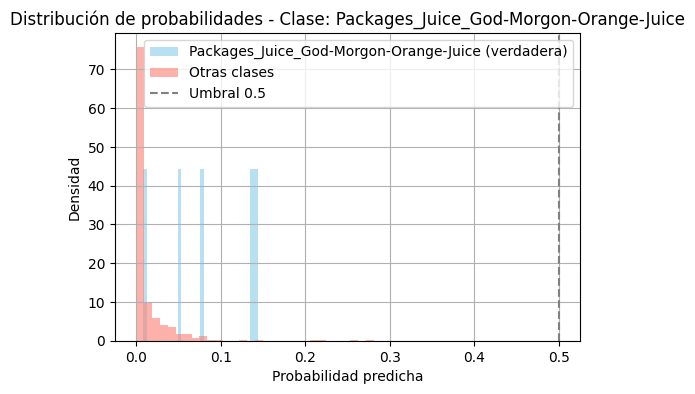

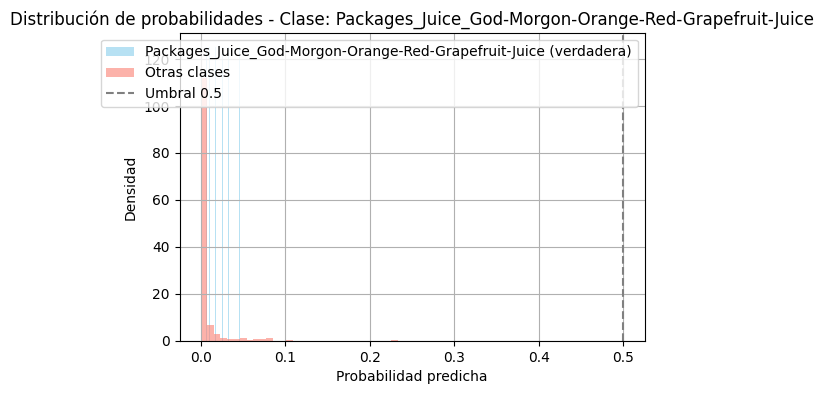

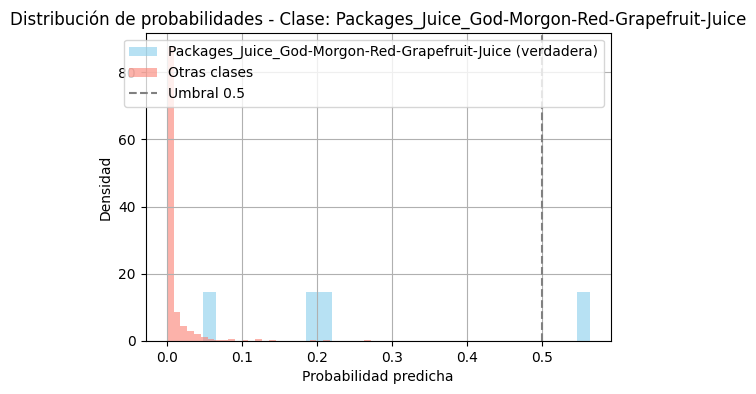

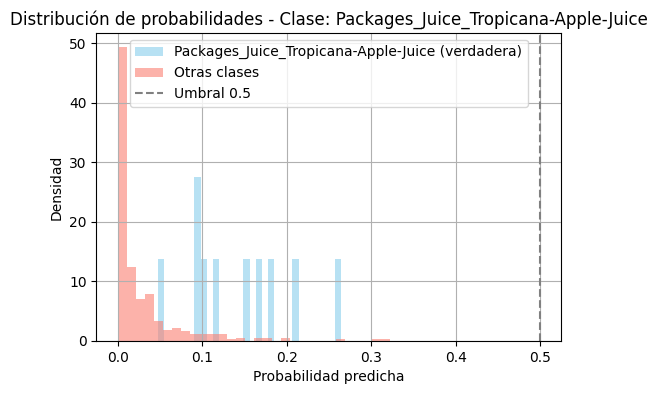

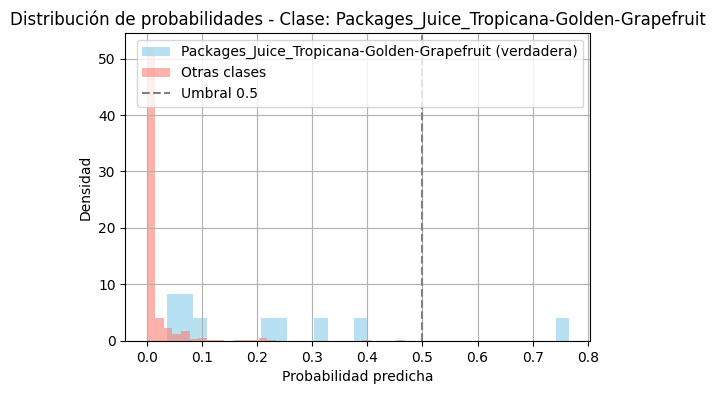

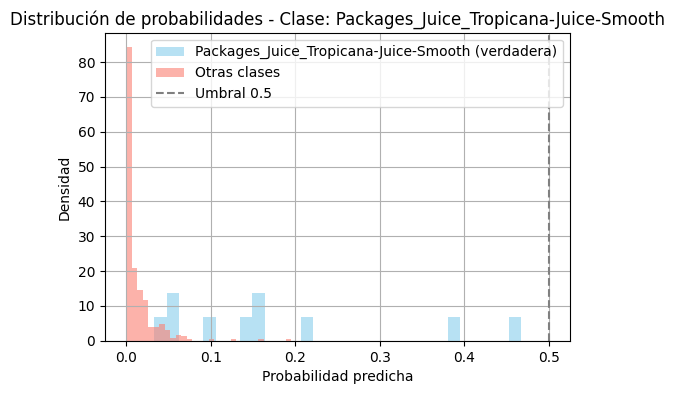

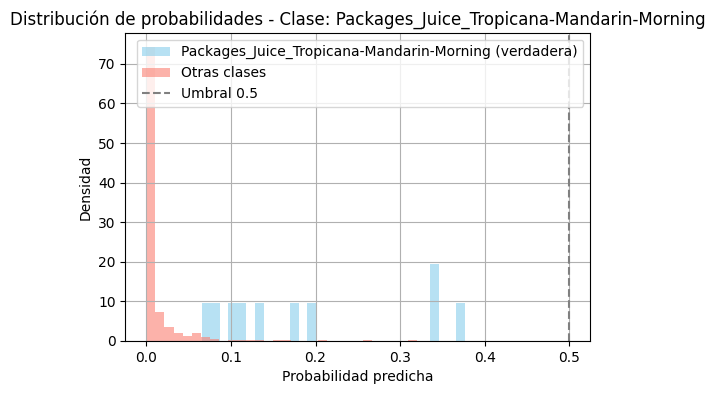

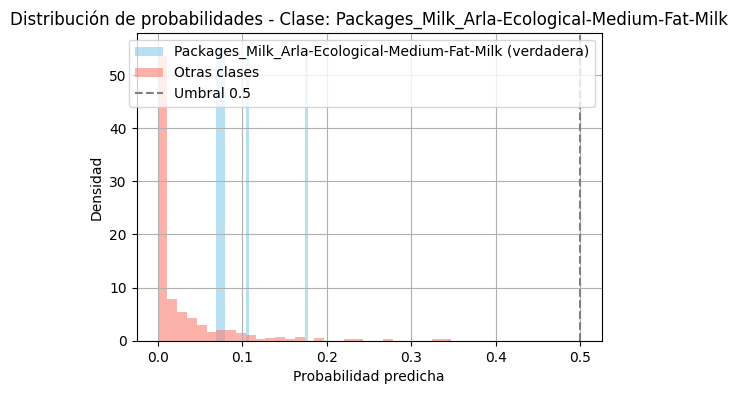

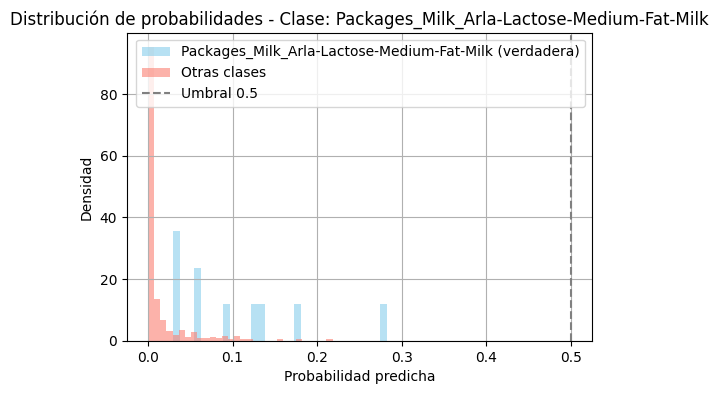

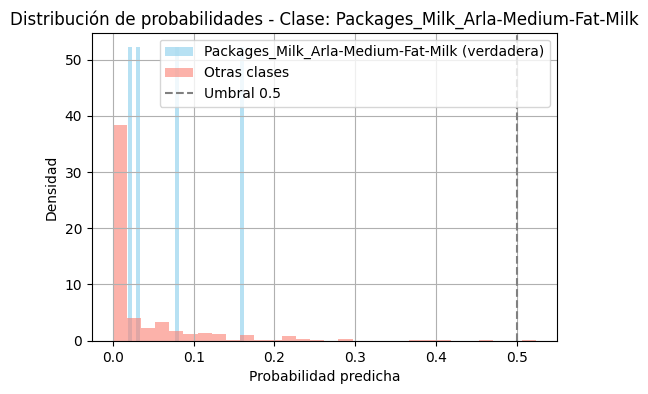

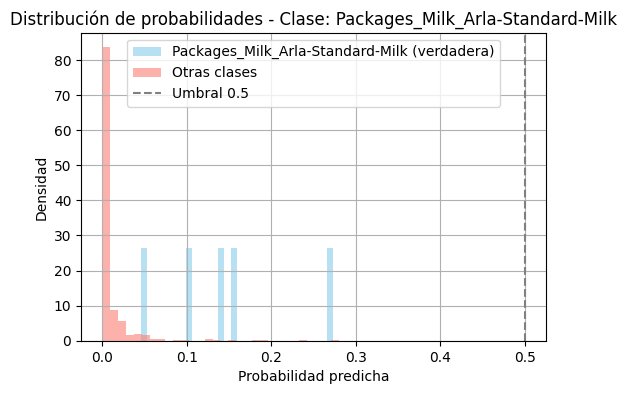

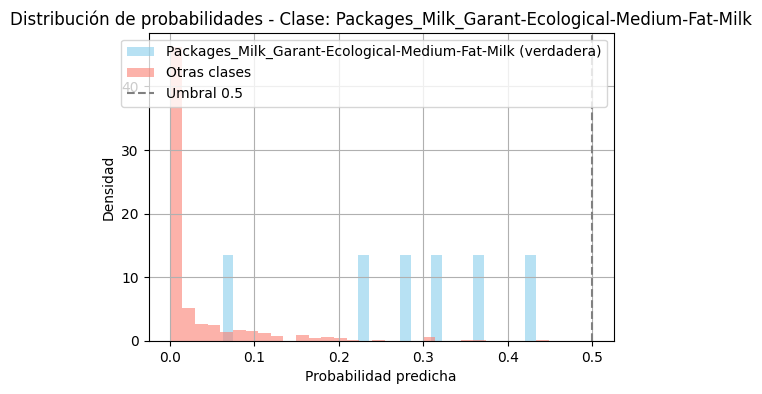

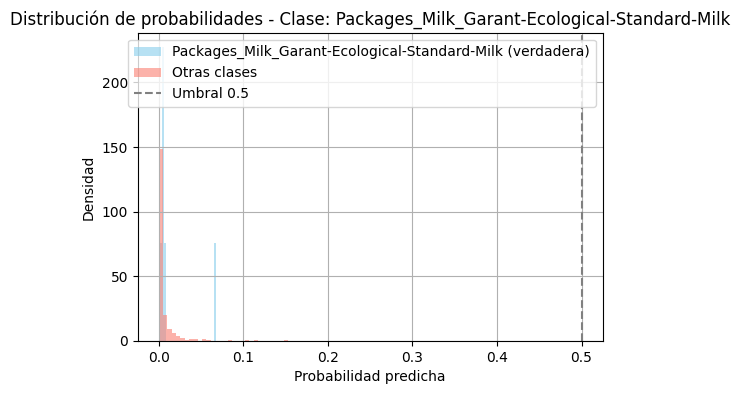

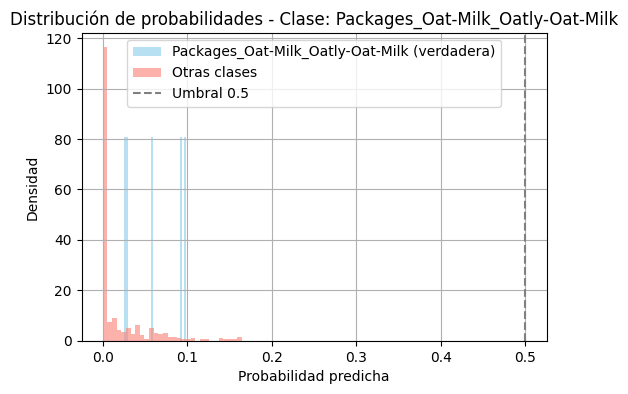

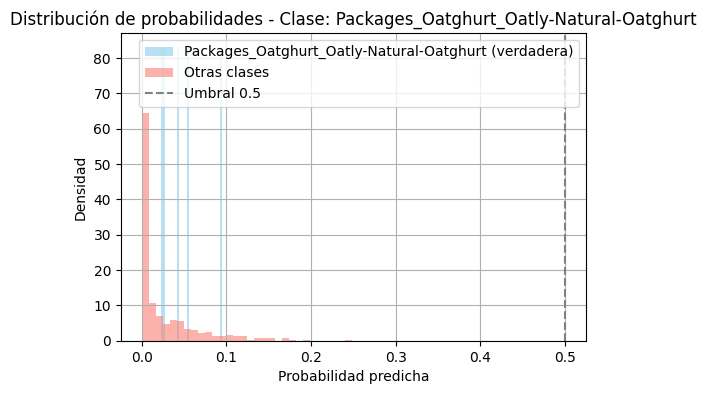

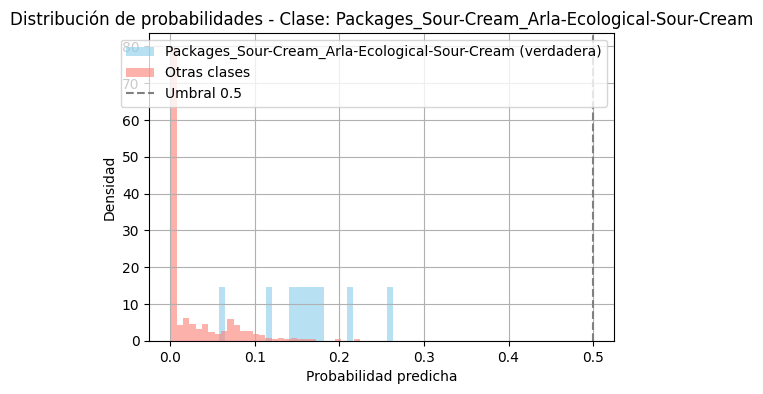

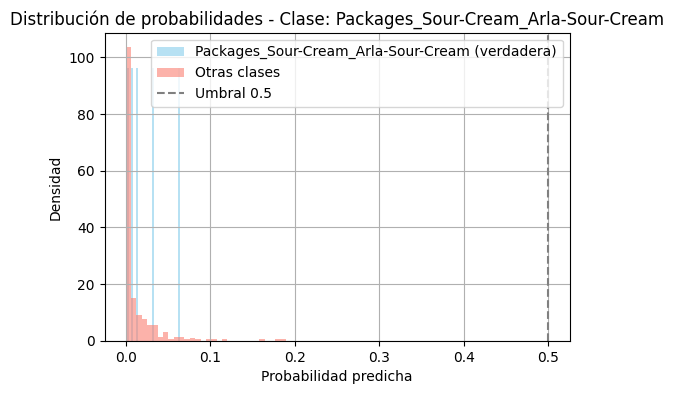

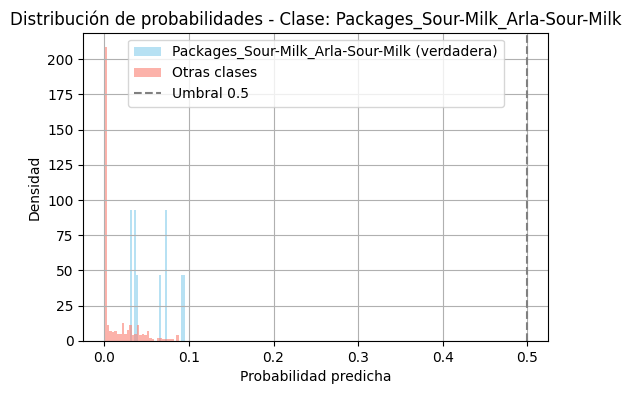

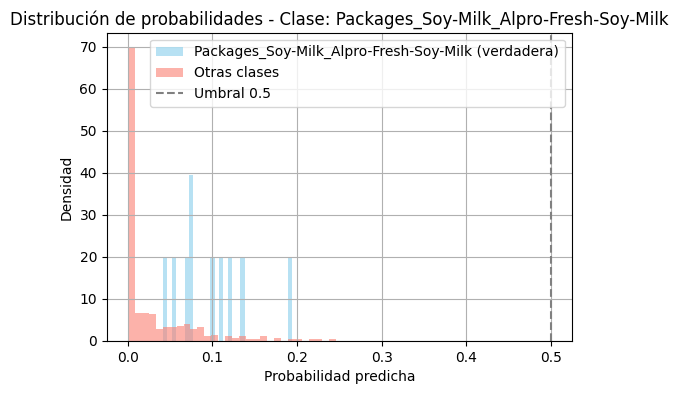

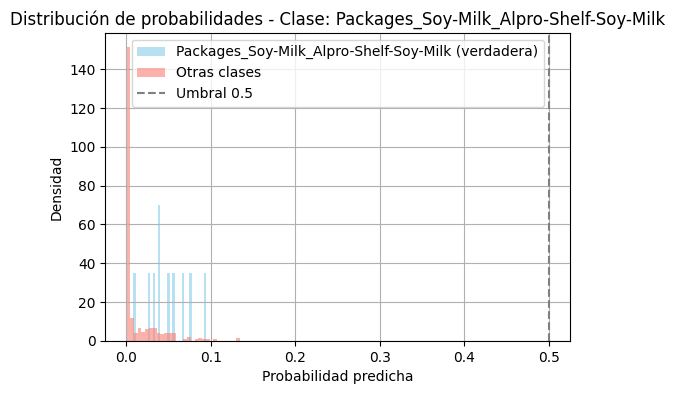

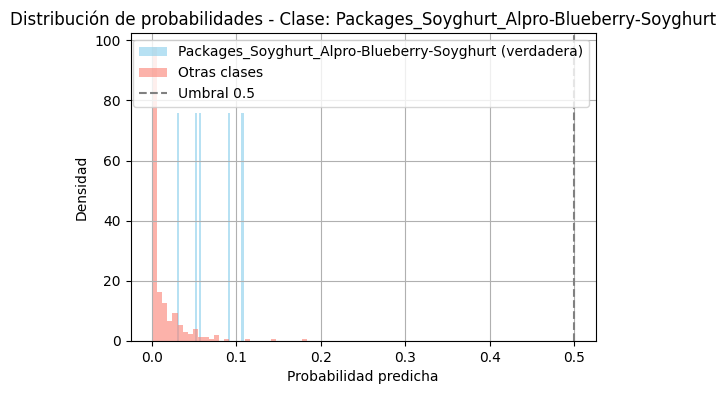

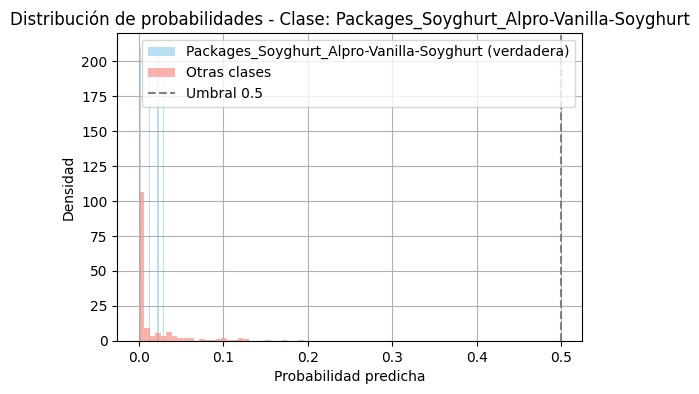

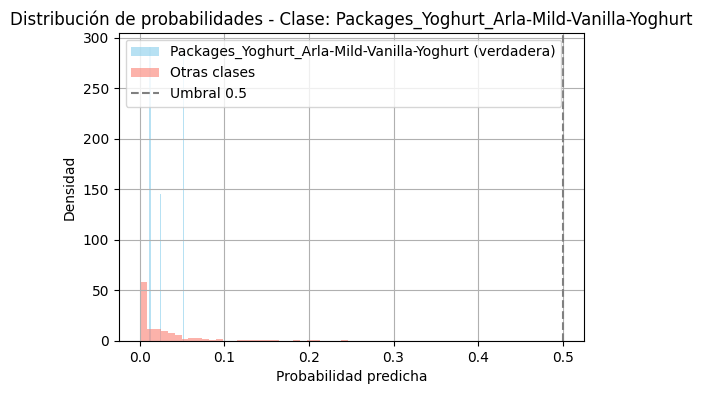

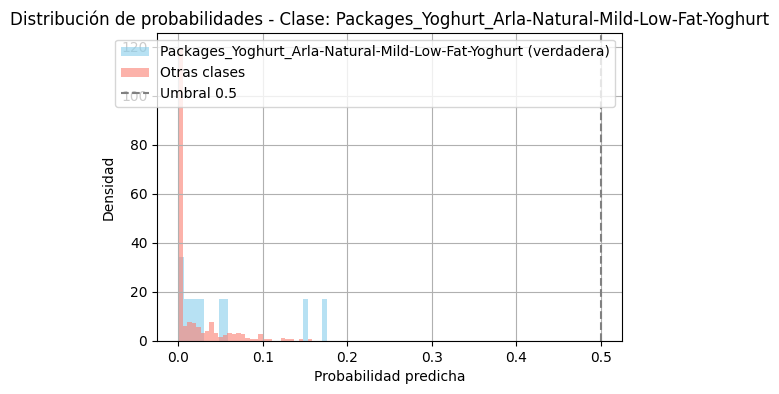

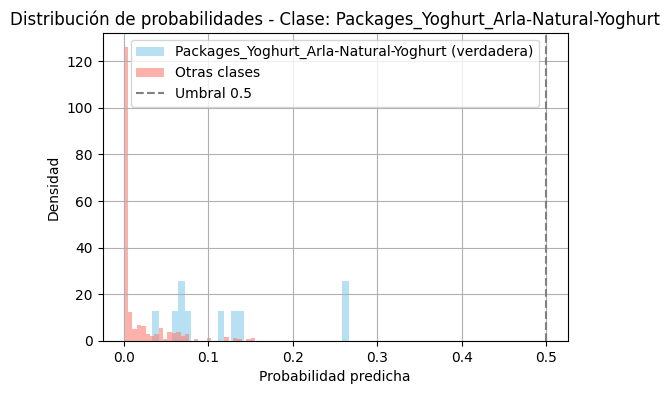

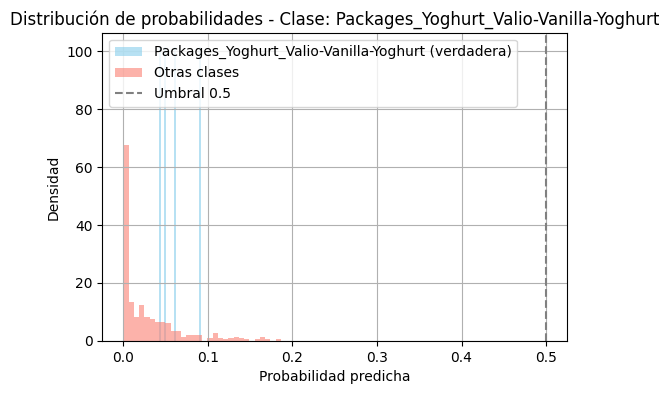

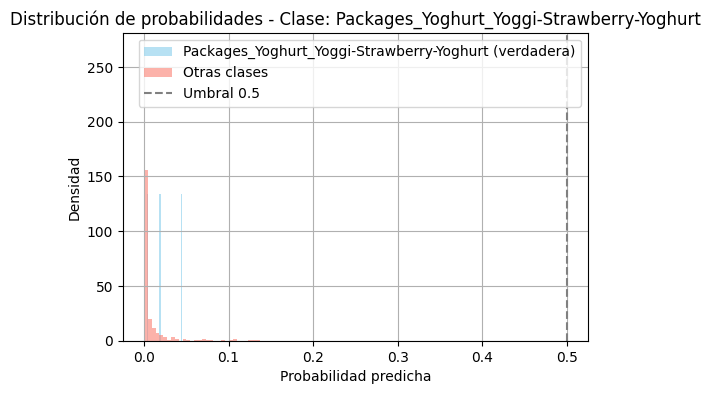

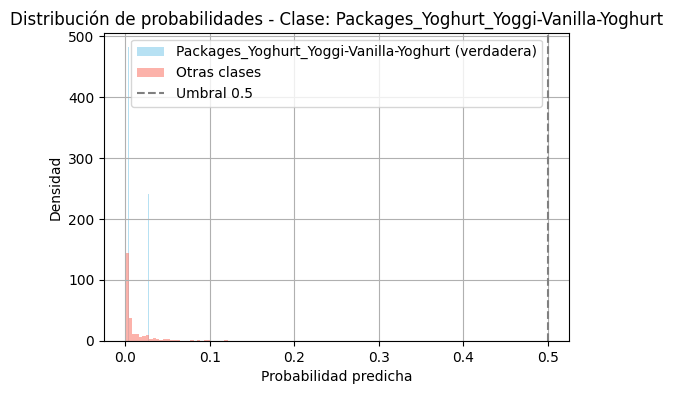

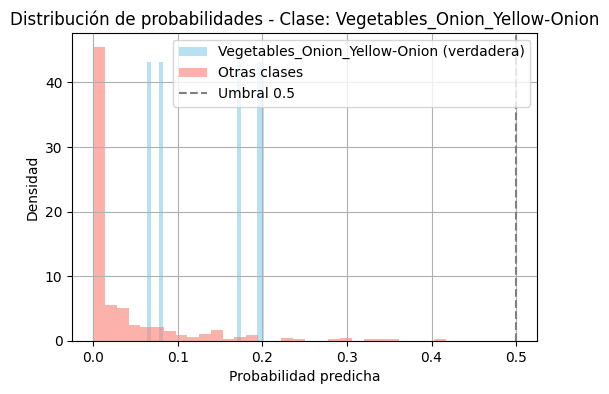

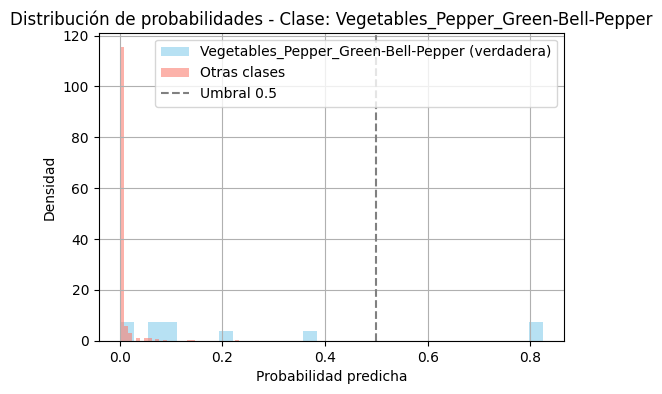

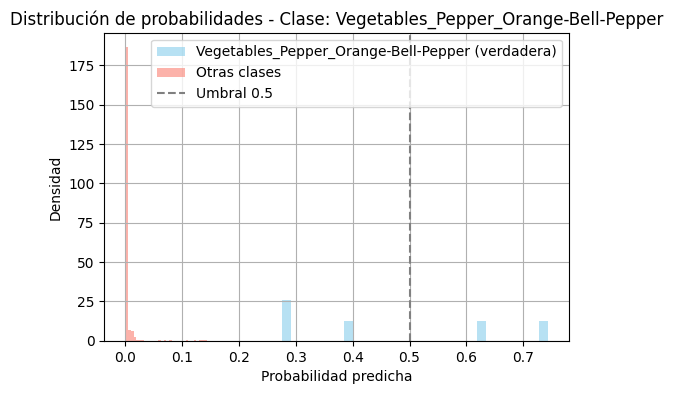

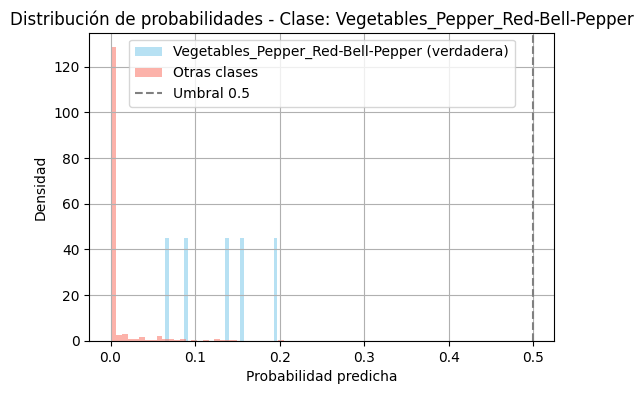

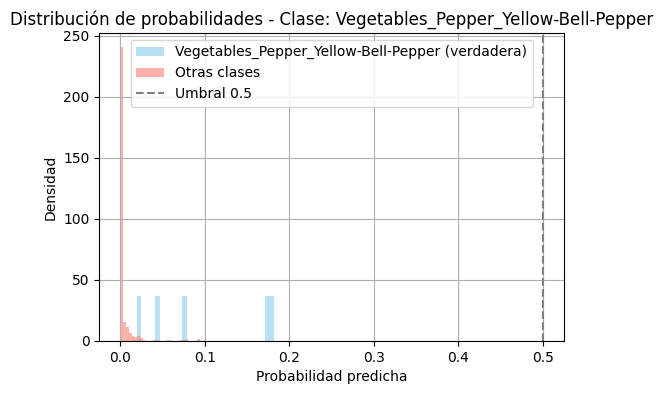

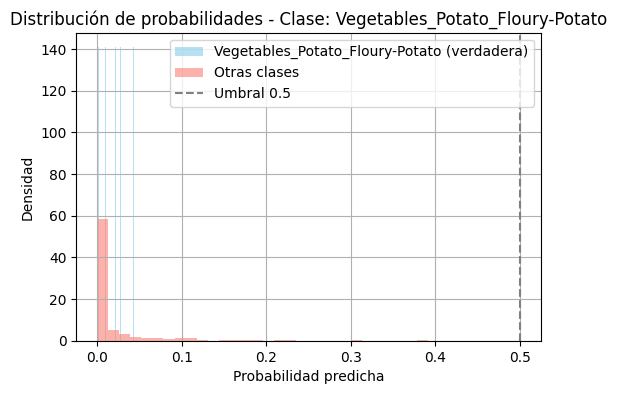

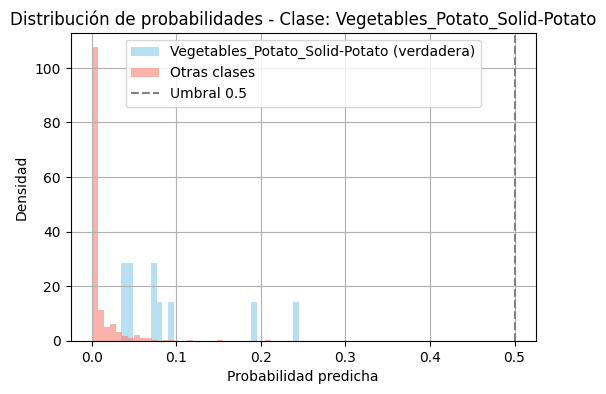

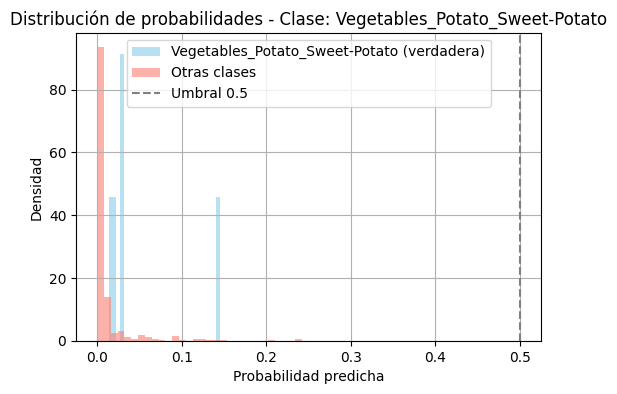

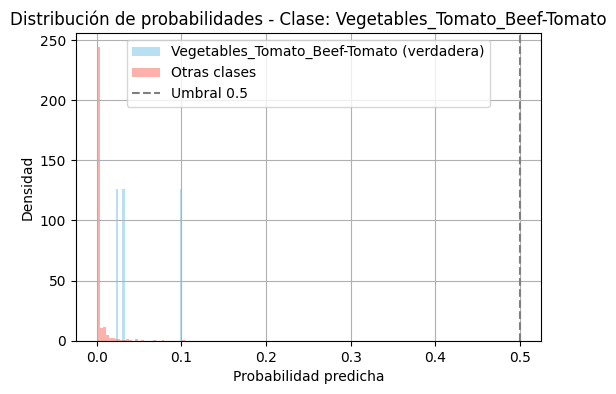

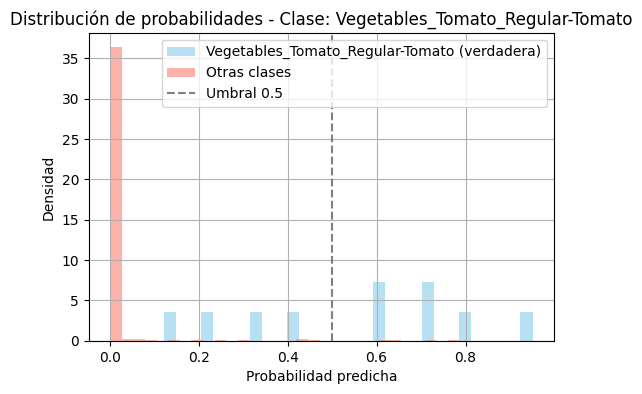

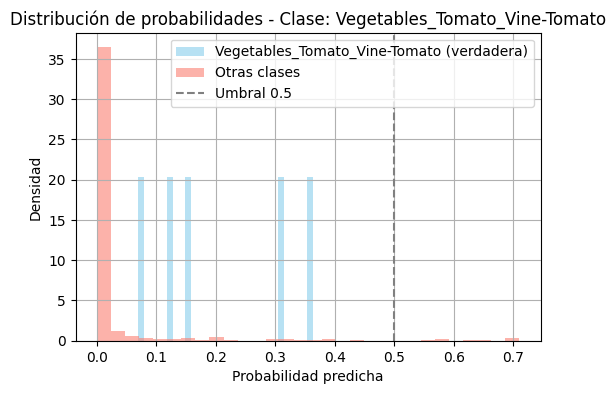

In [9]:
# 📈 Distribución de probabilidades para cada clase
for i, class_name in enumerate(class_names):
    ev.plot_prediction_distribution(y_true, y_scores[:, i], class_index=i, class_name=class_name)

In [9]:
# ✅ Reflexión final
print("✅ Evaluación completa. Analiza si hay overfitting, errores sistemáticos o clases mal representadas.")

✅ Evaluación completa. Analiza si hay overfitting, errores sistemáticos o clases mal representadas.
